<a href="https://colab.research.google.com/github/Saramando/263F/blob/main/Midterm_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

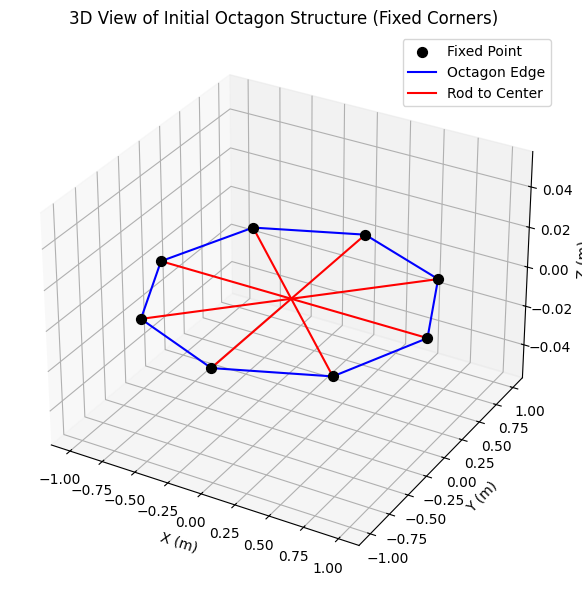

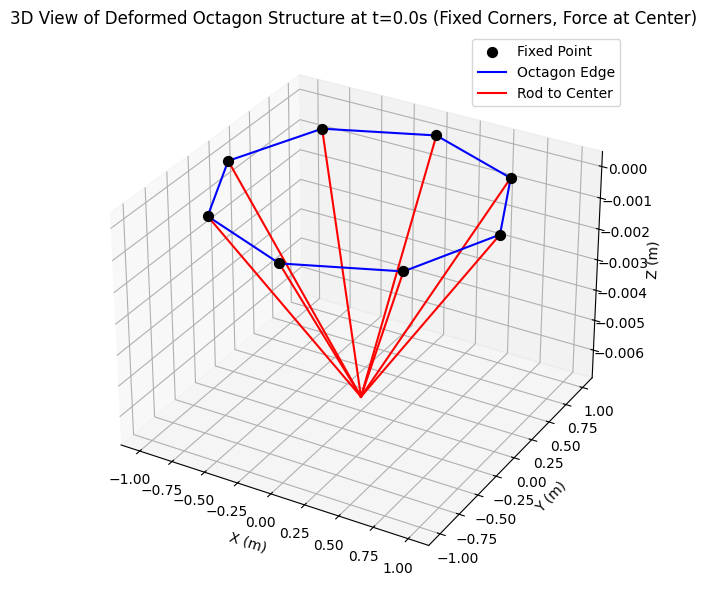

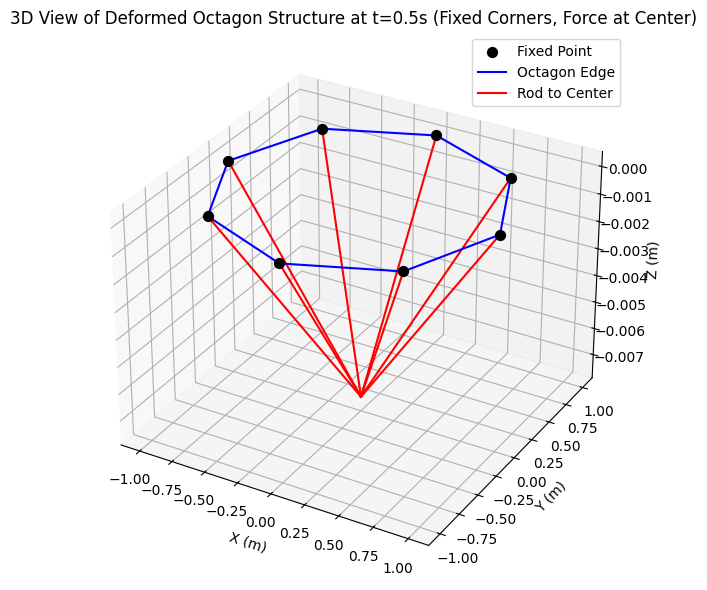

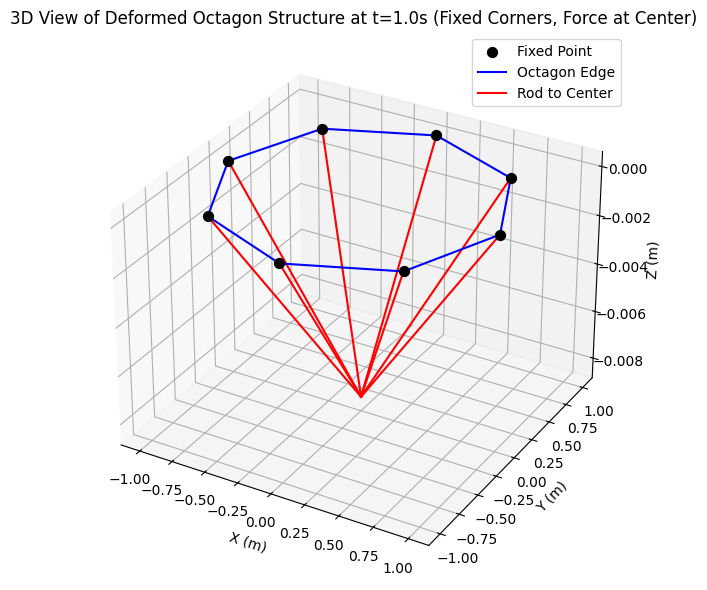

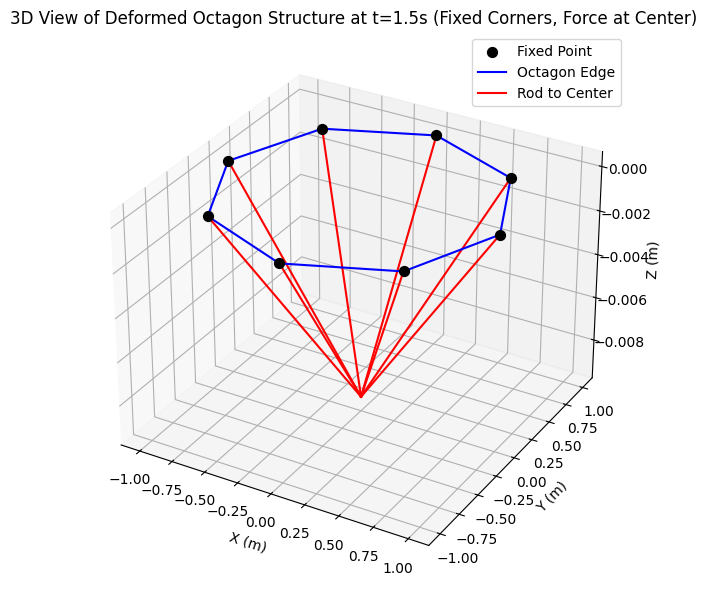

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output # Only for IPython





import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameter settings
initial_force = 5000  # Initial force in Newtons
simulation_time = 2  # Simulation time in seconds
time_steps = 100  # Number of time steps
dt = simulation_time / time_steps

# Initialize force variation over time
force_values = np.linspace(initial_force, 0, time_steps)

# Initialize rod parameters
length = 0.01  # Length of the rod in meters
area = 0.0000283  # Cross-sectional area in square meters
elastic_modulus = 5e9  # Elastic modulus in Pascals (steel)

# Newton-Raphson method to solve for displacement
def newton_raphson(force, length, area, elastic_modulus, tol=1e-6, max_iter=100):
    displacement = 0.0  # Initial displacement
    for i in range(max_iter):
        gradient = (elastic_modulus * area / length) * displacement - force
        hessian = elastic_modulus * area / length
        if abs(gradient) < tol:
            break
        displacement -= gradient / hessian
    return displacement

# Record displacements during the simulation
displacements = []

for force in force_values:
    displacement = newton_raphson(force, length, area, elastic_modulus)
    displacements.append(displacement)

# Parameters for the octagon
num_sides = 8
angle_between_rods = 2 * np.pi / num_sides
radius = 1.0  # Radius of the octagon

# Display initial state before applying force
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Draw each side of the octagon and rods pointing to the center (initial state)
for i in range(num_sides):
    # Calculate the position of each corner
    start_x = radius * np.cos(i * angle_between_rods)
    start_y = radius * np.sin(i * angle_between_rods)
    start_z = 0

    # Calculate the position of the next corner
    end_x = radius * np.cos((i + 1) * angle_between_rods)
    end_y = radius * np.sin((i + 1) * angle_between_rods)
    end_z = 0

    # Fixed corner position (cannot move)
    ax.scatter(start_x, start_y, start_z, color='k', s=50, label='Fixed Point' if i == 0 else "")

    # Draw the edge of the octagon
    ax.plot([start_x, end_x], [start_y, end_y], [start_z, end_z], color='b', label='Octagon Edge' if i == 0 else "")

    # Draw the rod pointing to the center
    ax.plot([start_x, 0], [start_y, 0], [start_z, 0], color='r', label='Rod to Center' if i == 0 else "")

ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('3D View of Initial Octagon Structure (Fixed Corners)')
ax.legend()

plt.tight_layout()
plt.show()

# Display the deformed shape every 0.5 seconds
interval = int(0.5 / dt)
for t in range(0, time_steps, interval):
    # Calculate the current displacement of each rod
    deformed_length = length - displacements[t] * 10  # Magnify displacement for visualization, direction along negative z-axis

    # Create 3D figure to show the deformed octagon
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Draw each side of the octagon and rods pointing to the center
    for i in range(num_sides):
        # Calculate the position of each corner
        start_x = radius * np.cos(i * angle_between_rods)
        start_y = radius * np.sin(i * angle_between_rods)
        start_z = 0

        # Calculate the position of the next corner
        end_x = radius * np.cos((i + 1) * angle_between_rods)
        end_y = radius * np.sin((i + 1) * angle_between_rods)
        end_z = 0

        # Fixed corner position (cannot move)
        ax.scatter(start_x, start_y, start_z, color='k', s=50, label='Fixed Point' if i == 0 else "")

        # Draw the edge of the octagon
        ax.plot([start_x, end_x], [start_y, end_y], [start_z, end_z], color='b', label='Octagon Edge' if i == 0 else "")

        # Draw the rod pointing to the center
        ax.plot([start_x, 0], [start_y, 0], [start_z, -deformed_length], color='r', label='Rod to Center' if i == 0 else "")

    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    ax.set_zlabel('Z (m)')
    ax.set_title(f'3D View of Deformed Octagon Structure at t={t*dt:.1f}s (Fixed Corners, Force at Center)')
    ax.legend()

    plt.tight_layout()
    plt.show()